In [43]:
import pandas as pd

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.svm import SVR

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
from sklearn.metrics import make_scorer

In [51]:
from sklearn.metrics import mean_squared_log_error

In [52]:
from sklearn.tree import export_graphviz

In [53]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import root_mean_squared_log_error,r2_score

In [54]:
import matplotlib.pyplot as plt

In [55]:
import pickle

In [56]:
pd.set_option("display.max_columns", None)

In [57]:
import numpy as np

In [58]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [59]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [60]:
from sklearn.model_selection import cross_validate

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv('../raw_data/belgian_property_prices.csv')

In [7]:
df.head()

,as_built_plan,available_as_of,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,building_condition,co2_emission,...,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,housenumber,street,city,postal,state,lat,lng,price
0,0.0,After signing the deed,1.0,1.0,12.0,10.0,10.0,3.0,Good,9802.0,...,11.0,NaN,30,Stationsstraat,Ronse,9600.0,Vlaams Gewest,50.743367,3.601306,275000
1,0.0,After signing the deed,1.0,1.0,15.0,11.0,11.0,4.0,Good,NaN,...,NaN,NaN,52,Wingenesteenweg,Wingene,8750.0,Vlaams Gewest,51.042146,3.302600,430000
2,NaN,After signing the deed,1.0,3.0,22.0,22.0,22.0,5.0,As new,NaN,...,6.0,NaN,157,Mechelsesteenweg,Antwerpen,2018.0,Vlaams Gewest,51.205030,4.410943,949000
3,0.0,NaN,NaN,3.0,33.0,30.0,23.0,5.0,As new,NaN,...,19.0,NaN,66,Noordzandstraat,Brugge,8000.0,Vlaams Gewest,51.206826,3.219186,2200000
4,0.0,After signing the deed,NaN,NaN,19.0,NaN,NaN,1.0,Just renovated,58.0,...,5.0,24263.0,15,Rue de l'Etoile,Wavre,1301.0,Région Wallonne,50.717062,4.577550,195000


In [8]:
(df.isnull().sum()/4769).sort_values(ascending=0)

dining_room                                       0.719438
office                                            0.697421
tv_cable                                          0.694066
planning_permission_obtained                      0.677291
proceedings_for_breach_of_planning_regulations    0.634934
yearly_theoretical_total_energy_consumption       0.620046
subdivision_permit                                0.619836
co2_emission                                      0.594045
width_of_the_lot_on_the_street                    0.582931
connection_to_sewer_network                       0.574544
basement                                          0.563430
street_frontage_width                             0.560705
furnished                                         0.557979
garden_surface                                    0.542881
possible_priority_purchase_right                  0.539316
latest_land_use_designation                       0.529461
surroundings_type                                 0.5233

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   as_built_plan                                   2389 non-null   float64
 1   available_as_of                                 3912 non-null   object 
 2   basement                                        2083 non-null   float64
 3   bathrooms                                       4523 non-null   float64
 4   bedroom_1_surface                               3163 non-null   float64
 5   bedroom_2_surface                               3105 non-null   float64
 6   bedroom_3_surface                               2623 non-null   float64
 7   bedrooms                                        4740 non-null   float64
 8   building_condition                              4485 non-null   object 
 9   co2_emission                             

In [17]:
pd.crosstab(index = df['energy_class'], columns='count')

col_0,count
energy_class,
A,172
A+,11
A++,2
B,665
C,812
C_B,1
D,882
E,747
F,802


In [10]:
pd.crosstab(index = df['available_as_of'], columns='count')

col_0,count
available_as_of,
After signing the deed,2909
At delivery,84
Depending on the tenant,198
Immediately,378
To be defined,343


In [11]:
pd.crosstab(index = df['building_condition'], columns='count')

col_0,count
building_condition,
As new,788
Good,1963
Just renovated,323
To be done up,646
To renovate,694
To restore,71


In [12]:
pd.crosstab(index = df['surroundings_type'], columns='count')

col_0,count
surroundings_type,
Concrete,5
Countryside,265
Fitted out,69
Isolated,620
Landscape,12
"Living area (residential, urban or rural)",506
Mall,26
Shop street,7
Urban,764


In [13]:
pd.crosstab(index = df['gas_water__electricity'], columns='count')

col_0,count
gas_water__electricity,
0.0,893
1.0,2331


In [27]:
df = df.drop_duplicates()

In [28]:
y = df['price']

In [40]:
X = df.drop(columns=['price'])

In [1]:
X_clean = df.drop(columns=['price','reference_number_of_the_epc_report','street','housenumber','external_reference','website'])

NameError: name 'df' is not defined

In [ ]:
len(y)

# SVM Regressor with Grid Search on imputators

In [ ]:
imputer_options = {
    'knn': KNNImputer(),
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'most_frequent': SimpleImputer(strategy='most_frequent')
}

num_transformer = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])
param_grid = [
    {
        'preprocessor__num_transformer__imputer': [KNNImputer()],
        'preprocessor__num_transformer__imputer__n_neighbors': [2, 3, 5, 10, 20]  # Parameters specific to KNNImputer
    },
    {
        'preprocessor__num_transformer__imputer': [
            SimpleImputer(strategy='mean'),
            SimpleImputer(strategy='median'),
            SimpleImputer(strategy='most_frequent')
        ]
        # No extra parameters needed for SimpleImputer
    }
]
grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=5,
    scoring="r2"
)

grid_search.fit(X, y)

grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# Decision Tree

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
num_transformer = Pipeline([
    ('imputer', KNNImputer())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor())
])

param_grid = [
    {
        'preprocessor__num_transformer__imputer__n_neighbors':[10],
         
          'tree__max_depth':[None,2,5,10,20],
        'tree__min_samples_split': [10, 20, 30]
    }
]

grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=5,
    scoring="r2"
)

In [ ]:
grid_search.fit(X, y)


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

# # XGBoost with RMSLE_NEG scoring

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

In [ ]:
rmsle_neg = make_scorer(
    lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5,
    greater_is_better=False
)

#scoring = rmsle_neg

In [ ]:
num_transformer = Pipeline([
    ('imputer', KNNImputer())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

param_grid = [
    {
        'preprocessor__num_transformer__imputer__n_neighbors':[10],
         'xgb__max_depth':[5,10],
        'xgb__learning_rate': [0.1,0.2],
        'xgb__n_estimators': [50,100]
    }
]

grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=5,
    scoring=rmsle_neg
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

# # XGBoost with R2 scoring

In [ ]:
num_transformer = Pipeline([
    ('imputer', KNNImputer())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features)
])

pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

param_grid = [
    {
        'preprocessor__num_transformer__imputer__n_neighbors':[10],
         'xgb__max_depth':[5],
        'xgb__learning_rate': [0.1],
        'xgb__n_estimators': [100]
    }
]

grid_search2 = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

In [ ]:
grid_search2.fit(X_train, y_train)

In [ ]:
grid_search2.best_score_

In [ ]:
grid_search2.best_params_

## XGBoost with RMSLE_NEG scoring Real Model on training data and including ordinal encoder

In [ ]:
X_clean.columns

In [ ]:
X_train.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

num_transformer = Pipeline([
    ('imputer', KNNImputer())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

cat2_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

numerical_features = X_clean.select_dtypes(include=['number']).columns.tolist()

cat2_features = ['energy_class','building_condition']

categorical_features = X_clean.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features.remove('energy_class')
categorical_features.remove('building_condition')

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features),
    ('cat2_transformer', cat2_transformer, cat2_features)
])

pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

param_grid = [
    {
        'preprocessor__num_transformer__imputer__n_neighbors': [10],  # Explore different levels of imputation complexity
        'xgb__max_depth': [3, 7],  # Lower depths often reduce overfitting
        'xgb__learning_rate': [0.01, 0.1],  # Lower learning rates with more estimators promote better generalization
        'xgb__n_estimators': [100],  # Higher estimators for lower learning rates
        'xgb__min_child_weight': [1, 10],  # Controls the minimum weight in a child node; larger values prevent overfitting
        'xgb__gamma': [0.1, 0.5],  # Adds a penalty for splits; higher values encourage simpler trees
        'xgb__subsample': [0.6, 1.0],  # Controls the fraction of samples used for each boosting round; smaller values prevent overfitting
        'xgb__colsample_bytree': [0.6, 1.0],  # Controls fraction of features for each tree; smaller values prevent overfitting
        'xgb__reg_alpha': [0, 1],  # L1 regularization, which can prevent complex patterns in leaves
        'xgb__reg_lambda': [1, 2]  # L2 regularization, higher values make the model more conservative
        
    }
]

fit_params = {
    "xgb__early_stopping_rounds": 10,
    "xgb__eval_metric": "r2",
    "xgb__eval_set": [(X_test, y_test)]
}

grid_search3 = GridSearchCV(
    pipeline3, 
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)


In [ ]:
grid_search3.fit(X_train, y_train, **fit_params)

In [ ]:
grid_search3.best_score_

In [ ]:
grid_search3.best_params_

# # XGBoost with selected hyper parameters (complete data with all features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

In [ ]:
X_train.columns

In [ ]:
num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=10))
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

cat2_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

cat2_features = ['energy_class','building_condition']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features.remove('energy_class')
categorical_features.remove('building_condition')

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features),
    ('cat2_transformer', cat2_transformer, cat2_features)
])

pipeline4 = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror',
                         use_label_encoder=False,
                         n_estimators=100, 
                   max_depth=5,
                   n_jobs=-1))
])

pipeline4.fit(X_train,y_train)
    

In [ ]:
pipeline4.score(X_train,y_train)

In [ ]:
pipeline4.score(X_test,y_test)

In [ ]:
y_pred = pipeline4.predict(X_test)

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
rmsle

In [ ]:
transformed_feature_names = numerical_features.copy()

# 2. Get categorical feature names from the OneHotEncoder and OrdinalEncoder
ohe_feature_names = pipeline4.named_steps['preprocessor'].named_transformers_['cat_transformer'].get_feature_names_out(categorical_features)
ordinal_feature_names = cat2_features  # Since OrdinalEncoder retains original names

# 3. Concatenate all transformed feature names
transformed_feature_names.extend(ohe_feature_names)
transformed_feature_names.extend(ordinal_feature_names)


xgb_model = pipeline4.named_steps['xgb']
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')


feature_importance_named = {transformed_feature_names[int(f[1:])]: importance for f, importance in feature_importance.items()}

# Sort and print the feature importance with names
sorted_feature_importance_named = sorted(feature_importance_named.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance (sorted by gain with feature names):")
for feature, importance in sorted_feature_importance_named:
    print(f"{feature}: {importance}")




## XGBoost with selected hyper parameters (removal of features)

In [36]:
X_clean = df.drop(columns=['price','reference_number_of_the_epc_report','street','housenumber','external_reference',
                           'website','available_as_of','co2_emission','cadastral_income','connection_to_sewer_network','flood_zone_type',
                          'gas_water__electricity','latest_land_use_designation','possible_priority_purchase_right','tv_cable','lat','lng',
                          'yearly_theoretical_total_energy_consumption','proceedings_for_breach_of_planning_regulations','postal','surroundings_type',
                          'primary_energy_consumption','office','bedroom_1_surface','bedroom_2_surface','bedroom_3_surface',
                          'planning_permission_obtained','width_of_the_lot_on_the_street','kitchen_surface','as_built_plan','basement','covered_parking_spaces',
                          'dining_room','garden_surface','kitchen_type','living_room_surface',
                           'number_of_frontages', 'outdoor_parking_spaces','street_frontage_width', 'subdivision_permit','state', 'heating_type',
                           'living_area','bathrooms'])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

In [38]:
num_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=10))
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

cat2_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

numerical_features = X_clean.select_dtypes(include=['number']).columns.tolist()

cat2_features = ['energy_class','building_condition']

categorical_features = X_clean.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_features.remove('energy_class')
categorical_features.remove('building_condition')

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, numerical_features),
    ('cat_transformer', cat_transformer, categorical_features),
    ('cat2_transformer', cat2_transformer, cat2_features)
])

pipeline5 = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror',
                         use_label_encoder=False,
                         n_estimators=100, 
                   max_depth=5,
                   n_jobs=-1))
])

pipeline5.fit(X_train,y_train)

/home/ak/.pyenv/versions/3.10.6/envs/real-estate-price-prediction/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=10))]),
                                                  ['bedrooms',
                                                   'construction_year',
                                                   'double_glazing',
                                                   'furnished',
                                                   'surface_of_the_plot',
                                                   'tenement_building',
                                                   'toilets']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city']),
                                                 ('cat2_transformer',
                                                  Ordinal...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [39]:
pipeline5.score(X_train,y_train)

0.9493439793586731

In [40]:
pipeline5.score(X_test,y_test)

0.7119022607803345

In [47]:
y_pred = pipeline5.predict(X_test)

#rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
#rmsle

In [41]:
# Export the pipeline as a pickle file
with open('../models/best_model_2.pkl', 'wb') as file:
    pickle.dump(pipeline5, file)

In [78]:
transformed_feature_names = numerical_features.copy()

# 2. Get categorical feature names from the OneHotEncoder and OrdinalEncoder
ohe_feature_names = pipeline5.named_steps['preprocessor'].named_transformers_['cat_transformer'].get_feature_names_out(categorical_features)
ordinal_feature_names = cat2_features  # Since OrdinalEncoder retains original names

# 3. Concatenate all transformed feature names
transformed_feature_names.extend(ohe_feature_names)
transformed_feature_names.extend(ordinal_feature_names)


xgb_model = pipeline5.named_steps['xgb']
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')


feature_importance_named = {transformed_feature_names[int(f[1:])]: importance for f, importance in feature_importance.items()}

# Sort and print the feature importance with names
sorted_feature_importance_named = sorted(feature_importance_named.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance (sorted by gain with feature names):")
for feature, importance in sorted_feature_importance_named:
    print(f"{feature}: {importance}")



Feature Importance (sorted by gain with feature names):
city_Knokke-Heist: 24933438586880.0
city_Watermael-Boitsfort: 6206742069248.0
living_area: 3676636971008.0
city_Lochristi: 3430968721408.0
state_Bruxelles: 3144265498624.0
tenement_building: 2943017549824.0
toilets: 2807587143680.0
state_Région Wallonne: 1977517604864.0
kitchen_type_Hyper equipped: 1223433125888.0
bathrooms: 1099267571712.0
number_of_frontages: 842318282752.0
city_Kraainem: 680616984576.0
surface_of_the_plot: 678268108800.0
covered_parking_spaces: 665533218816.0
city_Uccle: 549666947072.0
building_condition: 544712556544.0
kitchen_type_USA hyper equipped: 513889730560.0
city_Bruxelles: 472641241088.0
city_Saint-Gilles: 461565460480.0
city_Libramont-Chevigny: 455329415168.0
city_Brugge: 408859213824.0
outdoor_parking_spaces: 396137988096.0
street_frontage_width: 378795753472.0
city_Hamme: 358045024256.0
living_room_surface: 345393266688.0
city_Lasne: 343384621056.0
city_Antwerpen: 283413413888.0
city_Ronse: 2585704

In [79]:
def plot_learning_curves(estimator, X_clean, y, metric=r2_score, cv=5):
    """
    Plot learning curves for a given estimator.

    Parameters:
    - estimator: The model to train, e.g., an XGBClassifier or XGBRegressor.
    - X, y: Features and target variable.
    - metric: Scoring function for validation (default is accuracy_score).
    - cv: Number of cross-validation folds.
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X_clean, y, cv=cv, scoring='r2',  # needs to be a string like 'r2'
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add fill_between for std deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")

    # Customize the plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

/home/ak/.pyenv/versions/3.10.6/envs/real-estate-price-prediction/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ak/.pyenv/versions/3.10.6/envs/real-estate-price-prediction/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ak/.pyenv/versions/3.10.6/envs/real-estate-price-prediction/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ak/.pyenv/versions/3.10.6/envs/real-estate-price-prediction/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:08:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use

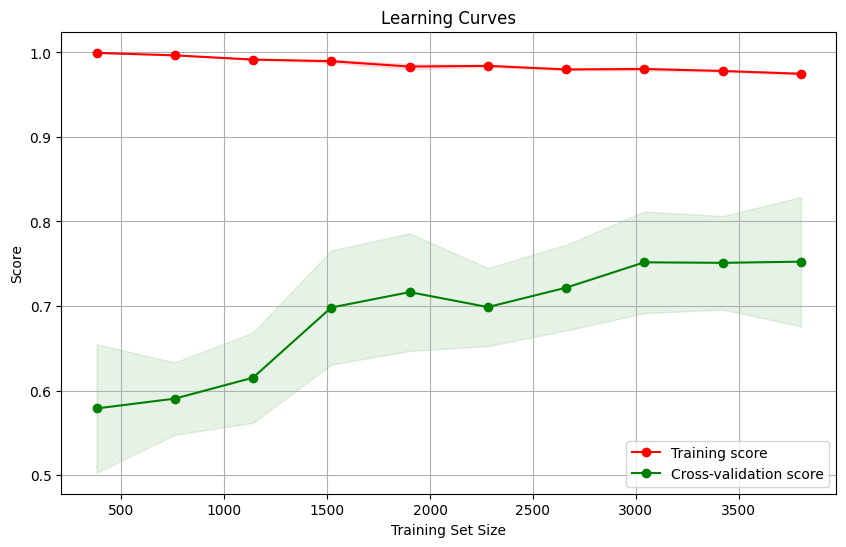

In [82]:
# Define an XGBoost model
#xgb_model = XGBRegressor(use_label_encoder=False, eval_metric='r2_score')

# Plot the learning curves
plot_learning_curves(pipeline5, X_clean, y, metric='r2')

In [42]:
X_clean.columns

Index(['bedrooms', 'building_condition', 'construction_year', 'double_glazing',
       'energy_class', 'furnished', 'surface_of_the_plot', 'tenement_building',
       'toilets', 'city'],
      dtype='object')

In [64]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4753 entries, 0 to 4769
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             4723 non-null   float64
 1   building_condition   4470 non-null   object 
 2   construction_year    3436 non-null   float64
 3   double_glazing       4104 non-null   float64
 4   energy_class         4753 non-null   object 
 5   furnished            2099 non-null   float64
 6   surface_of_the_plot  4547 non-null   float64
 7   tenement_building    4706 non-null   float64
 8   toilets              4335 non-null   float64
 9   city                 4704 non-null   object 
dtypes: float64(7), object(3)
memory usage: 408.5+ KB
